<a href="https://colab.research.google.com/github/sheebajosetj/Machine-Learning-/blob/main/MachineLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/vehiclesFinal.csv')
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374222 entries, 0 to 374221
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        374222 non-null  object 
 1   year          374222 non-null  float64
 2   manufacturer  374222 non-null  object 
 3   model         374222 non-null  object 
 4   condition     374222 non-null  object 
 5   cylinders     374222 non-null  object 
 6   fuel          374222 non-null  object 
 7   odometer      374222 non-null  float64
 8   title_status  374222 non-null  object 
 9   transmission  374222 non-null  object 
 10  drive         374222 non-null  object 
 11  size          374222 non-null  object 
 12  type          374222 non-null  object 
 13  paint_color   374222 non-null  object 
 14  lat           374222 non-null  float64
 15  long          374222 non-null  float64
 16  price         374222 non-null  int64  
dtypes: float64(4), int64(1), object(12)
memory usage

In [ ]:
def convert_cylinder_value_into_integer(cylinder_val):
    if isinstance(cylinder_val, str) and ' cylinders' in cylinder_val:
        return int(cylinder_val.replace(' cylinders', ''))  # was getting an error when you run the code the reason was because when you tried to convert this values into intger some values in the column was already integer and then when you tried to change them agian you encountered the error and you need to modify the code which is given here

    elif isinstance(cylinder_val, int):
        return cylinder_val
    else:
        return 0

df['cylinders'] = df['cylinders'].apply(convert_cylinder_value_into_integer)
df.head()


,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,mohave county,2012.0,jeep,patriot,like new,4,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,oregon coast,2014.0,bmw,328i m-sport,good,5,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,greenville / upstate,2001.0,dodge,caravan,excellent,6,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,mohave county,2004.0,chevrolet,colorado ls,excellent,5,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,maine,2005.0,ford,mustang convertible,excellent,6,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [ ]:
cat_cols = ['region','manufacturer','model','condition','fuel','title_status','transmission','drive','size','type','paint_color']
# Unique values for cat columns
for ix in cat_cols:
  print("Unique Values in {} column: {}".format(ix, df[ix].nunique()))

Unique Values in region column: 402
Unique Values in manufacturer column: 41
Unique Values in model column: 27908
Unique Values in condition column: 6
Unique Values in fuel column: 5
Unique Values in title_status column: 6
Unique Values in transmission column: 3
Unique Values in drive column: 3
Unique Values in size column: 4
Unique Values in type column: 13
Unique Values in paint_color column: 12


In [ ]:
# getting the mean price of used car in each region
region_wise = df.groupby('region')['price'].mean().reset_index(drop = False).set_index('region')
region_wise.sort_values(by = 'price')

,price
region,
eastern panhandle,6878.120879
new river valley,7538.568807
meadville,7701.666667
la salle co,7766.035714
kenosha-racine,7877.537931
...,...
olympic peninsula,25400.514377
salt lake city,25637.977346
north dakota,25868.630137


<Axes: ylabel='Frequency'>

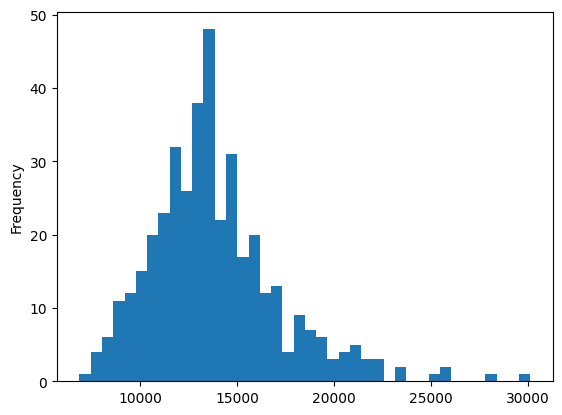

In [ ]:
region_wise['price'].plot(kind = 'hist', bins = 40)

In [ ]:
# getting the 20th and 90th percentile value of prices from the mean region prices data.
upper_percentile_value = region_wise['price'].quantile(0.90)
lower_percentile_value = region_wise['price'].quantile(0.20)
print("Upper Percentile Price: {} \nLower Percentile Price: {}".format(upper_percentile_value, lower_percentile_value))

Upper Percentile Price: 18379.018104448744 
Lower Percentile Price: 11263.327009222661


In [ ]:
# function to bin the regions on the basis of mean price in each region
def region_kind(x):
  if region_wise.loc[x, 'price'] > upper_percentile_value:
    return "expensive"
  elif region_wise.loc[x, 'price'] <= lower_percentile_value:
    return "cheaper"
  else:
    return "moderate"

df['region'] = df['region'].apply(lambda x: region_kind(x))
df['region'].value_counts()

moderate     302389
cheaper       41417
expensive     30416
Name: region, dtype: int64

In [ ]:
df['model'].value_counts()

f-150                    7009
silverado 1500           4746
forester touring         4224
1500                     3913
silverado                3369
                         ... 
super v8 portfolio          1
silverdo 1500               1
6s sport                    1
focus se sedan 4 door       1
dakota 4x4 rt               1
Name: model, Length: 27908, dtype: int64

In [ ]:
def model_freq(x):
  if (x >1000):
   return "very_common"

  elif (x<5):
    return "less_common"

  else:
    return "common"
model_value_counts = df['model'].value_counts().reset_index().rename({'index': 'model', 'model': 'count'}, axis=1)
model_value_counts['model_cat'] = model_value_counts['count'].apply(model_freq)
model_value_counts.head(10)

,model,count,model_cat
0,f-150,7009,very_common
1,silverado 1500,4746,very_common
2,forester touring,4224,very_common
3,1500,3913,very_common
4,silverado,3369,very_common
5,camry,2904,very_common
6,accord,2851,very_common
7,altima,2570,very_common
8,escape,2532,very_common
9,civic,2513,very_common


In [ ]:
model_dictionary = dict(zip(model_value_counts.model,model_value_counts.model_cat))
df['model'] = df['model'].map(model_dictionary)
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,moderate,2012.0,jeep,common,like new,4,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,moderate,2014.0,bmw,less_common,good,5,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,moderate,2001.0,dodge,common,excellent,6,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,moderate,2004.0,chevrolet,common,excellent,5,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,moderate,2005.0,ford,common,excellent,6,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = ['odometer', 'long','lat', 'cylinders']
poly = PolynomialFeatures(3)
df_polynomial = pd.DataFrame(poly.fit_transform(df[poly_features].values)[:,1:], columns = poly.get_feature_names_out(input_features=poly_features)[1:])
# df_polynomial.head()
df = pd.concat([df_polynomial, df.drop(poly_features, axis = 1)], axis = 1).dropna().reset_index(drop=True)
df.head()

,odometer,long,lat,cylinders,odometer^2,odometer long,odometer lat,odometer cylinders,long^2,long lat,...,model,condition,fuel,title_status,transmission,drive,size,type,paint_color,price
0,247071.0,-114.2690,34.4554,4.0,6.104408e+10,-2.823256e+07,8.512930e+06,988284.0,13057.404361,-3937.184103,...,common,like new,gas,clean,automatic,4wd,full-size,offroad,silver,3495
1,76237.0,-123.8240,46.1837,5.0,5.812080e+09,-9.439970e+06,3.520907e+06,381185.0,15332.382976,-5718.650469,...,less_common,good,gas,clean,automatic,rwd,full-size,sedan,grey,13750
2,199000.0,-81.9654,34.9352,6.0,3.960100e+10,-1.631111e+07,6.952105e+06,1194000.0,6718.326797,-2863.477642,...,common,excellent,gas,clean,automatic,4wd,full-size,offroad,grey,2300
3,54000.0,-114.2710,34.4783,5.0,2.916000e+09,-6.170634e+06,1.861828e+06,270000.0,13057.861441,-3939.869819,...,common,excellent,gas,clean,automatic,rwd,mid-size,pickup,red,9000
4,62800.0,-69.7858,44.2070,6.0,3.943840e+09,-4.382548e+06,2.776200e+06,376800.0,4870.057882,-3085.020861,...,common,excellent,gas,clean,automatic,rwd,mid-size,convertible,silver,8500


In [ ]:
cat_cols = ['region','manufacturer','model','condition','fuel','title_status','transmission','drive','size','type','paint_color']
# Unique values for cat columns
for ix in cat_cols:
  print("Unique Values in {} column: {}".format(ix, df[ix].nunique()))

Unique Values in region column: 3
Unique Values in manufacturer column: 41
Unique Values in model column: 3
Unique Values in condition column: 6
Unique Values in fuel column: 5
Unique Values in title_status column: 6
Unique Values in transmission column: 3
Unique Values in drive column: 3
Unique Values in size column: 4
Unique Values in type column: 13
Unique Values in paint_color column: 12


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(df[cat_cols])

# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(cat_cols))

# Concatenate the original DataFrame without categorical columns and the encoded DataFrame
df = pd.concat([df.drop(cat_cols, axis=1), encoded_df], axis=1)

df.head()

,odometer,long,lat,cylinders,odometer^2,odometer long,odometer lat,odometer cylinders,long^2,long lat,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,247071.0,-114.2690,34.4554,4.0,6.104408e+10,-2.823256e+07,8.512930e+06,988284.0,13057.404361,-3937.184103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,76237.0,-123.8240,46.1837,5.0,5.812080e+09,-9.439970e+06,3.520907e+06,381185.0,15332.382976,-5718.650469,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,199000.0,-81.9654,34.9352,6.0,3.960100e+10,-1.631111e+07,6.952105e+06,1194000.0,6718.326797,-2863.477642,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,54000.0,-114.2710,34.4783,5.0,2.916000e+09,-6.170634e+06,1.861828e+06,270000.0,13057.861441,-3939.869819,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,62800.0,-69.7858,44.2070,6.0,3.943840e+09,-4.382548e+06,2.776200e+06,376800.0,4870.057882,-3085.020861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
# Train-Test split dataset
def trainingData(df):
    X = df.drop('price', axis = 1)
    y = df['price']
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling data
norm = StandardScaler()
X_train_scaled = norm.fit_transform(X_train)
X_test_scaled = norm.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

LR = Ridge()
LR.fit(X_train_scaled,y_train)

Ridge()

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_train_pred = LR.predict(X_train_scaled)
y_test_pred = LR.predict(X_test_scaled)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error ,mean_squared_error, r2_score, mean_absolute_percentage_error
def result(y_test,y_pred):
    r=[]
    r.append(mean_absolute_error(y_test, y_pred))
    r.append(mean_squared_error(y_test, y_pred))
    # RMSE
    r.append(np.sqrt(r[1]))
    r.append(mean_absolute_percentage_error(y_test, y_pred))
    r.append(r2_score(y_test,y_pred))
    return (r)

In [ ]:
r_train = result(y_train,y_train_pred)
r_test = result(y_test,y_test_pred)
# Mean Absolute Error - MAE
# Mean Squared Error - MSE
# Root Mean Squared Error - RMSE
# Mean Absolute Percentage Error - MAPE
# R2 Score
print("Train MAE : {:.2f} Test MAE: {:.2f}".format(r_train[0], r_test[0]))
print("Train MSE : {:.2f}, Test MSE: {:.2f}".format(r_train[1], r_test[1]))
print("Train RMSE : {:.2f} Test RMSE: {:.2f}".format(r_train[2], r_test[2]))
print("Train MAPE : {:.2f} Test MAPE: {:.2f}".format(r_train[3], r_test[3]))
print("Train R2 Score : {:.2f} or {:.2f}% Test R2 Score: {:.2f} or {:.2f}%".format(r_train[4],round(r_train[4]*100, 2), r_test[4],round(r_test[4]*100, 2)))

Train MAE : 4202.20 Test MAE: 4184.49
Train MSE : 43974109.50, Test MSE: 43288393.57
Train RMSE : 6631.30 Test RMSE: 6579.39
Train MAPE : 0.54 Test MAPE: 0.55
Train R2 Score : 0.65 or 64.58% Test R2 Score: 0.65 or 64.80%


In [ ]:
#### LINEAR REGRESSION MODEL ACCURACIES
# Train MAE : 4417.60 Test MAE: 4412.51
# Train MSE : 47031656.31, Test MSE: 46628167.98
# Train RMSE : 6857.96 Test RMSE: 6828.48
# Train MAPE : 0.59 Test MAPE: 0.59
# Train R2 Score : 0.62 or 62.12% Test R2 Score: 0.62 or 62.09%

In [ ]:
### POLY - 1
# Train MAE : 4335.13 Test MAE: 4324.74
# Train MSE : 45743700.29, Test MSE: 45253473.92
# Train RMSE : 6763.41 Test RMSE: 6727.07
# Train MAPE : 0.56 Test MAPE: 0.57
# Train R2 Score : 0.63 or 63.16% Test R2 Score: 0.63 or 63.20%

In [ ]:
# Train MAE : 4202.20 Test MAE: 4184.49
# Train MSE : 43974109.50, Test MSE: 43288393.57
# Train RMSE : 6631.30 Test RMSE: 6579.39
# Train MAPE : 0.54 Test MAPE: 0.55
# Train R2 Score : 0.65 or 64.58% Test R2 Score: 0.65 or 64.80%

In [ ]:
# BAD MODEL WITH POLY
# Train MAE : 4382.71 Test MAE: 5020.23
# Train MSE : 46246252.24, Test MSE: 14400921593.65
# Train RMSE : 6800.46 Test RMSE: 120003.84
# Train MAPE : 0.58 Test MAPE: 0.69
# Train R2 Score : 0.63 or 62.75% Test R2 Score: -116.10 or -11609.81%